In [4]:
!python -m pip install git+https://github.com/huggingface/transformers

  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-28i97_fp
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-28i97_fp
  Resolved https://github.com/huggingface/transformers to commit f42d46ccb406695fb57c0c669526f67fc30d1d84
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.49.0.dev0-py3-none-any.whl size=10745383 sha256=6f5526905b4f3aaec7c86488e61679f8e3aaf0fe52e1ddee386759b558015a02
  Stored in directory: /tmp/pip-ephem-wheel-cache-6myq3lf8/wheels/04/a3/f1/b88775f8e1665827525b19ac7590250f1038d947067beba9fb
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.48.2
    Uninstalling transformers-4.48.2:
      Successfully uninstalled transformers-4.48.2


In [5]:
from transformers import Qwen2VLForConditionalGeneration,AutoTokenizer,AutoProcessor

In [6]:
model=Qwen2VLForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2-VL-2B-Instruct",
    trust_remote_code=True,
    torch_dtype="auto",
    device_map="auto")

The argument `trust_remote_code` is to be used with Auto classes. It has no effect here and is ignored.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/56.4k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/3.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/429M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/272 [00:00<?, ?B/s]

In [10]:
processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-2B-Instruct")

preprocessor_config.json:   0%|          | 0.00/347 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

In [12]:
from PIL import Image
import requests

In [ ]:
# image_path="images/elect2025.png"
# image = Image.open(image_path)

# messages = [
#     {
#         "role": "user",
#         "content": [
#             {
#                 "type": "image",
#             },
#             {
#                 "type": "text",
#                 "text": "Explain the election results in details? Your analysis should help the election startegic planner."
#             }
#         ]
#     }
# ]

In [ ]:
# image_path="images/form2.png"
# image = Image.open(image_path)

# messages = [
#     {
#         "role": "user",
#         "content": [
#             {
#                 "type": "image",
#             },
#             {
#                 "type": "text",
#                 "text": "You are an expert in creating field configuration from the image? The assistant identifies and extracts different types of form fields such as textboxes, labels, dropdowns, checkboxes, etc., along with their corresponding names or identifiers. The result should be returned in JSON format, with each field type paired with its name or label. The field types may include 'textbox', 'label', 'dropdown', 'checkbox', etc., and the field names are the corresponding headers or identifiers next to the fields. Do not generate your own field names.Your analysis should help the configuration."
#             }
#         ]
#     }
# ]

In [14]:
image_path="/content/gdrive/MyDrive/gen-ai/vison-llm/images/bar1.png"
image = Image.open(image_path)

messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
            },
            {
                "type": "text",
                "text": "Explain the bar chart in details? Explain each bar in detail with insights of each bar. Your analysis should help the experts in their domain."
            }
        ]
    }
]

In [15]:
text_prompt=processor.apply_chat_template(messages,add_generation_prompt=True)

In [16]:
inputs=processor(images=[image],
                 text=[text_prompt],
                 padding = True,
                 return_tensors="pt")

In [17]:
inputs = inputs.to("cuda")

In [18]:
output_ids = model.generate(**inputs, max_new_tokens=1024)

In [19]:
generated_ids = [
    output_ids[len(input_ids) :]
    for input_ids, output_ids in zip(inputs.input_ids, output_ids)
]

output_text = processor.batch_decode(
    generated_ids, skip_special_tokens=True, clean_up_tokenization_spaces=True
)

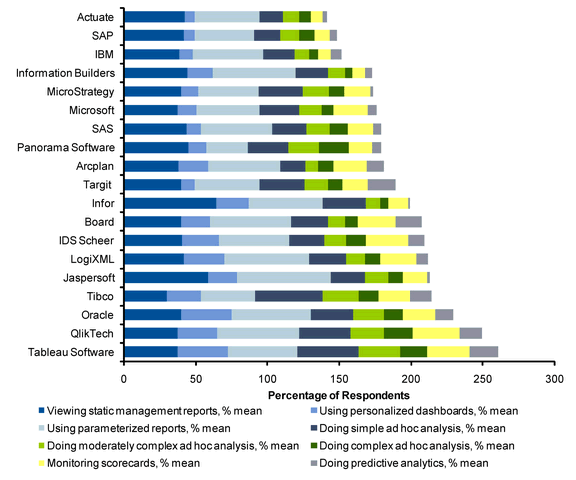

In [27]:
image

In [20]:
output_text

['This bar chart compares the usage of various tools and techniques by respondents in the field of business intelligence and analytics. The x-axis measures the percentage of respondents, ranging from 0 to 300. The y-axis represents the different tools and techniques, with a range of options including "Actuate," "SAP," "IBM," "Information Builders," "MicroStrategy," "Microsoft," "SAS," "Panorama Software," "Arcplan," "Target," "Infor," "Board," "IDS Scheer," "LogiXML," "Jaspersoft," "Tibco," "Oracle," and "QlikTech."\n\nThe chart shows that the most commonly used tool is "Actuate," which is used by 150% of respondents. This is followed by "SAP," which is used by 140% of respondents. "IBM" is used by 130% of respondents, and "Information Builders" is used by 120% of respondents. "MicroStrategy" is used by 110% of respondents, and "Microsoft" is used by 100% of respondents. "SAS" is used by 90% of respondents, and "Panorama Software" is used by 80% of respondents. "Arcplan" is used by 70%